In [1]:
import tensorflow as tf

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2



# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [96]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_unido_0_pocos_nulos.csv")

In [97]:
df

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,anyo,mes,dia,hora,dia_semanal
0,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15,2
1,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2
2,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2
3,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15,2
4,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,CyeWQ7K6jWDDbI4Kd,192.168.1.195,123.0,89.221.210.188,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0,5
25010999,CS9u9p3IiuKuTYfauc,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,Malicious C&C,2019,9,20,1,4
25011000,ChLFLFZumxpFdFbV8,192.168.1.195,123.0,212.111.30.190,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0,5
25011001,CdOxuh15kV4eHJYKkb,192.168.1.195,123.0,5.1.56.123,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0,5


TARGET

In [98]:
df.drop(columns={"uid"}, inplace=True)

In [99]:
df.rename(columns={"label":"target"}, inplace=True)

<AxesSubplot:xlabel='target', ylabel='Count'>

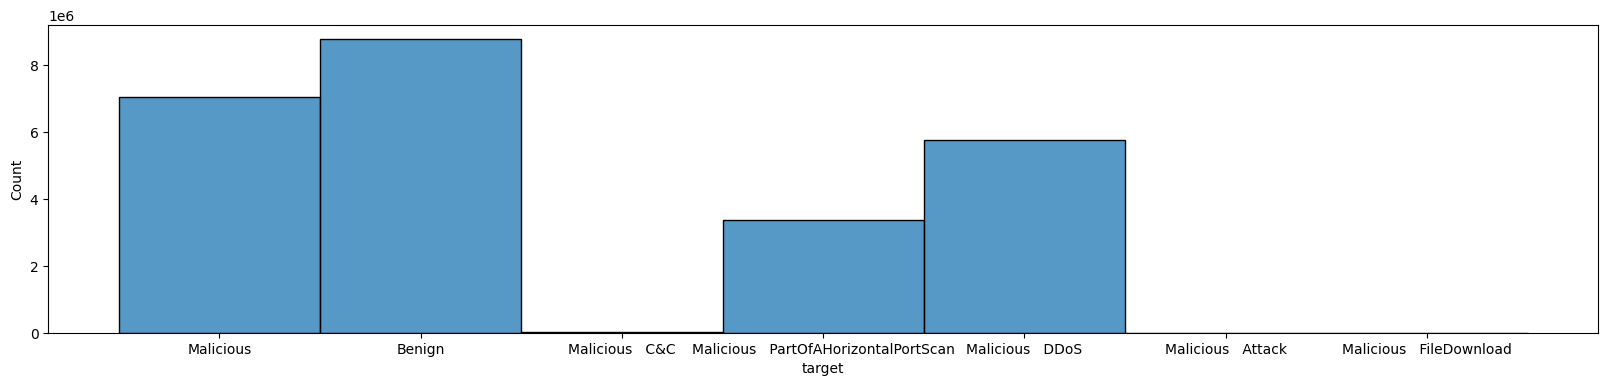

In [100]:
plt.figure(figsize=(20,4))
sns.histplot(df.target)

In [101]:
df.target.shape

(25011003,)

In [102]:
df.target.unique()

array(['Malicious', 'Benign', 'Malicious   C&C',
       'Malicious   PartOfAHorizontalPortScan', 'Malicious   DDoS',
       'Malicious   Attack', 'Malicious   FileDownload'], dtype=object)

CONVERTUIMOS LOS VALORES MALICIOUS CON ALGUNA PALABRA EN MALICIOUS PARA QUEDARNOS CON UNA COLUMNA BINARIA

In [103]:
def reemplazar_malicioso(valor):
  if valor in ["Malicious   C&C", "Malicious   PartOfAHorizontalPortScan",
              "Malicious   DDoS", "Malicious   Attack", "Malicious   FileDownload"]:
    return "Malicious"
  else:
    return valor
  

In [104]:
df["Target"] = df["target"].apply(reemplazar_malicioso)


In [105]:
df.Target.shape

(25011003,)

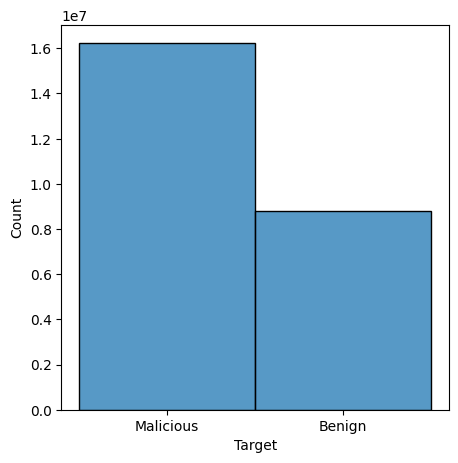

In [106]:
plt.figure(figsize=(5,5))
sns.histplot(df.Target, bins=100);

In [107]:
df.Target.value_counts()/len(df)*100

Malicious    64.894818
Benign       35.105182
Name: Target, dtype: float64

LA TARGET ESTA DESBALANCEADA

In [108]:
df.drop(columns={"target"}, inplace=True)


In [109]:
bt.obtener_estadisticas(df)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
id.orig_h,0.09,object,No,192.168.1.196,No,No,No,No,No,categorica ordinal,0.0
id.orig_p,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
id.resp_h,46.6,object,No,162.248.88.215,No,No,No,No,No,categorica ordinal,0.0
id.resp_p,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
proto,0.0,object,No,tcp,No,No,No,No,No,categorica ordinal,0.0
conn_state,0.0,object,No,S0,No,No,No,No,No,categorica ordinal,0.0
missed_bytes,0.0,float64,76.33,No,381679.91,145679555881.059998,0.0,0.0,0.0,numerica continua,0.0
history,0.0,object,No,S,No,No,No,No,No,categorica ordinal,0.1
orig_pkts,0.0,float64,13.5,No,17511.7,306659531.76,1.0,1.0,3.0,numerica continua,0.0
orig_ip_bytes,0.01,float64,590.02,No,687810.32,473083036333.98999,40.0,60.0,180.0,numerica continua,0.0


In [110]:
df


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,192.168.1.195,123.0,89.221.210.188,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25010999,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,2019,9,20,1,4,Malicious
25011000,192.168.1.195,123.0,212.111.30.190,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25011001,192.168.1.195,123.0,5.1.56.123,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign


TRANSFORMACION CATAEGORICAS Y NUMERICAS SALVO TARGET, YA Q LA VOY A BALANCEAR UN POCO CON SMOTE

In [111]:
col_cat=['id.orig_h',"id.resp_h","proto","conn_state","history"]
col_num=['orig_pkts', 'orig_ip_bytes',
       'resp_pkts', 'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora',
       'dia_semanal', "id.resp_p", "missed_bytes","id.orig_p"]
Target="Target"

In [112]:
#LABEL ENCONDER( a las categoricas)
lb = LabelEncoder()

for col in col_cat:
    df[col] = lb.fit_transform(df[col])

In [113]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,8939,51524.0,9752626,23.0,1,6,0.0,40,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
1,8939,56305.0,9664603,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
2,8939,41101.0,732384,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
3,8939,60905.0,1983916,23.0,1,6,0.0,40,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
4,8939,44301.0,11185695,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,8932,123.0,11036754,123.0,2,10,0.0,14,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25010999,8932,37306.0,165032,17769.0,1,7,0.0,168,8952.0,483602.0,9613.0,520116.0,2019,9,20,1,4,Malicious
25011000,8932,123.0,7305270,123.0,2,10,0.0,14,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25011001,8932,123.0,9086491,123.0,2,10,0.0,14,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign


In [114]:
"""#MESTANDARIZACION (ya que l< distribucion no normal)
st=StandardScaler()

for col in df.drop(["Target"], axis=1):
    df[col] = st.fit_transform(df[col].values.reshape(-1,1))"""


'#MESTANDARIZACION (ya que l< distribucion no normal)\nst=StandardScaler()\n\nfor col in df.drop(["Target"], axis=1):\n    df[col] = st.fit_transform(df[col].values.reshape(-1,1))'

In [122]:
columnas_numericas = df.drop(["Target"], axis=1).select_dtypes(include=['float64', 'int64'])
# Inicializa el MinMaxScaler
scaler = MinMaxScaler()

# Escala los datos 
scaled_data = scaler.fit_transform(columnas_numericas)

# rango
rango_deseado_min = 0
rango_deseado_max = 1

# Multiplica los datos x los rangos
scaled_data_rescaled = scaled_data * (rango_deseado_max - rango_deseado_min) + rango_deseado_min

# Redondea los datos escalados rescalados al entero más cercano
scaled_data_rescaled_int = pd.DataFrame(scaled_data_rescaled).round().astype(int)

# Concatena los datos rescalados enteros con la columna "Target" y el resto del DataFrame original
df_minmax_scaled = pd.concat([df["Target"], scaled_data_rescaled_int], axis=1)


In [123]:
df_minmax_scaled

,Target,0,1,2,3,4,5,6,7,8,9,10,11
0,Malicious,1,0,0,0,0,0,0,0,0,0,1,0
1,Malicious,1,0,0,0,0,0,0,0,0,0,1,0
2,Malicious,1,0,0,0,0,0,0,0,0,0,1,0
3,Malicious,1,0,0,0,0,0,0,0,0,0,1,0
4,Malicious,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,Benign,0,0,0,0,0,0,0,1,1,1,0,1
25010999,Malicious,1,0,0,0,0,1,1,1,1,1,0,1
25011000,Benign,0,0,0,0,0,0,0,1,1,1,0,1
25011001,Benign,0,0,0,0,0,0,0,1,1,1,0,1


In [144]:
for col in df_minmax_scaled.iloc[:, 1:].columns:
   
    print(df_minmax_scaled[col].value_counts(normalize=True))
    print()
   

1    0.755278
0    0.244722
Name: 0, dtype: float64

0    0.846863
1    0.153137
Name: 1, dtype: float64

0    1.000000e+00
1    3.998240e-08
Name: 2, dtype: float64

0    9.999999e-01
1    7.996481e-08
Name: 3, dtype: float64

0    9.999998e-01
1    1.599296e-07
Name: 4, dtype: float64

0    9.999998e-01
1    2.398944e-07
Name: 5, dtype: float64

0    9.999994e-01
1    5.597536e-07
Name: 6, dtype: float64

0    0.720922
1    0.279078
Name: 7, dtype: float64

1    0.817526
0    0.182474
Name: 8, dtype: float64

1    0.902974
0    0.097026
Name: 9, dtype: float64

1    0.556847
0    0.443153
Name: 10, dtype: float64

1    0.648423
0    0.351577
Name: 11, dtype: float64



LA MAPEO EN 0 Y 1

In [157]:
MAPPING={"Malicious": 0, "Benign": 1}

df_minmax_scaled["Target"].replace(MAPPING, inplace=True)

In [158]:
bt.obtener_estadisticas(df_minmax_scaled)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Target,0.0,int64,0.35,No,0.48,0.23,0.0,0.0,1.0,numerica discreta,0.0
0,0.0,int64,0.76,No,0.43,0.18,1.0,1.0,1.0,numerica discreta,0.0
1,0.0,int64,0.15,No,0.36,0.13,0.0,0.0,0.0,numerica discreta,0.0
2,0.0,int64,0.0,No,0.0,0.0,0.0,0.0,0.0,numerica discreta,0.0
3,0.0,int64,0.0,No,0.0,0.0,0.0,0.0,0.0,numerica discreta,0.0
4,0.0,int64,0.0,No,0.0,0.0,0.0,0.0,0.0,numerica discreta,0.0
5,0.0,int64,0.0,No,0.0,0.0,0.0,0.0,0.0,numerica discreta,0.0
6,0.0,int64,0.0,No,0.0,0.0,0.0,0.0,0.0,numerica discreta,0.0
7,0.0,int64,0.28,No,0.45,0.2,0.0,0.0,1.0,numerica discreta,0.0
8,0.0,int64,0.82,No,0.39,0.15,1.0,1.0,1.0,numerica discreta,0.0


SPLIT

In [129]:
X= df.drop(["Target"], axis=1)
y=df["Target"]

In [145]:
MAPPING={"Malicious": 0, "Benign": 1}

df["Target"].replace(MAPPING, inplace=True)

In [146]:
df.Target

0           0
1           0
2           0
3           0
4           0
           ..
25010998    1
25010999    0
25011000    1
25011001    1
25011002    1
Name: Target, Length: 25011003, dtype: int64

In [147]:
df.Target.dtype

dtype('int64')

In [159]:
df_minmax_scaled.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_1_1_3_minmax.csv", index=False)

In [57]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_1_1_2_proceso.csv.csv")

In [3]:
df_minmax_scaled=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_1_1_3_minmax.csv")

In [161]:
df_minmax_scaled.head()

,Target,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0


In [5]:
df_array=df_minmax_scaled.values

In [6]:
df_array

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [7]:
X= df_minmax_scaled.iloc[:,1:]
y=df_minmax_scaled.iloc[:,0]

In [167]:
#df_minmax_scaled.iloc[:,1:]
#f_minmax_scaled.iloc[:,0]

In [8]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.1, random_state=42)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22509902, 12)
(22509902,)
(2501101, 12)
(2501101,)


In [ ]:

# balanceo la clase target
peso_clase_0 = len(y_train[y_train == 1]) / len(y_train)
peso_clase_1 = len(y_train[y_train == 0]) / len(y_train)

In [20]:

import tensorboard

# Definir el directorio de registro para TensorBoard(ensorBoard es una herramienta esencial para entender, depurar y optimizar los modelos de TensorFlow.)
log_dir = r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs\fit"

# Configurar TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True, )

In [10]:
#modelo
modelo = tf.keras.Sequential()

# Capa de entrada
modelo.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(12,)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu', input_dim=12))
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu'))
       
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases

#modelo.add(Dense(units=64, activation='relu', input_dim=16))
#modelo.add(Dense(units=32, activation='relu'))
#modelo.add(Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases

#optimizador
optimizador=Adam( learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=50, verbose=1, validation_split=0.3)


Epoch 1/50
30776/30776 [==============================] - 130s 4ms/step - loss: 0.1420 - accuracy: 0.9454 - val_loss: 0.1350 - val_accuracy: 0.9456
Epoch 2/50
30776/30776 [==============================] - 127s 4ms/step - loss: 0.1349 - accuracy: 0.9456 - val_loss: 0.1344 - val_accuracy: 0.9456
Epoch 3/50
30776/30776 [==============================] - 129s 4ms/step - loss: 0.1350 - accuracy: 0.9456 - val_loss: 0.1345 - val_accuracy: 0.9456
Epoch 4/50
30776/30776 [==============================] - 128s 4ms/step - loss: 0.1347 - accuracy: 0.9456 - val_loss: 0.1343 - val_accuracy: 0.9456
Epoch 5/50
30776/30776 [==============================] - 130s 4ms/step - loss: 0.1346 - accuracy: 0.9456 - val_loss: 0.1343 - val_accuracy: 0.9456
Epoch 6/50
30776/30776 [==============================] - 129s 4ms/step - loss: 0.1347 - accuracy: 0.9456 - val_loss: 0.1346 - val_accuracy: 0.9456
Epoch 7/50
30776/30776 [==============================] - 128s 4ms/step - loss: 0.1346 - accuracy: 0.9456 - val_

In [11]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              513000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2002      
Total params: 2,523,658
Trainable params: 2,523,658
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

78160/78160 [==============================] - 194s 2ms/step - loss: 0.1345 - accuracy: 0.9456
Loss: 0.13453908264636993
Accuracy: 0.9455687999725342
              precision    recall  f1-score   support

           0       0.98      0.93      0.96   1622554
           1       0.88      0.97      0.93    878547

    accuracy                           0.95   2501101
   macro avg       0.93      0.95      0.94   2501101
weighted avg       0.95      0.95      0.95   2501101



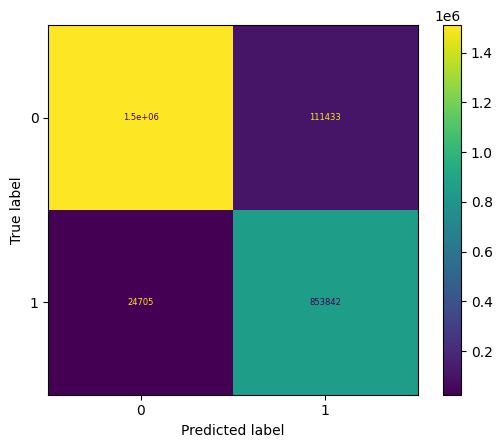

In [16]:
grafica = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_classes))
grafica.plot()
plt.show()

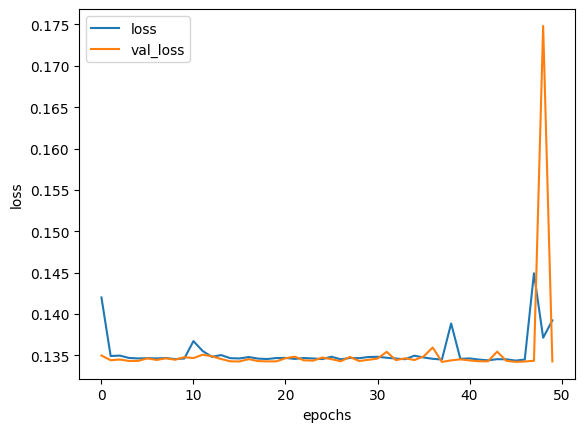

In [13]:
df_history = pd.DataFrame(historia.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

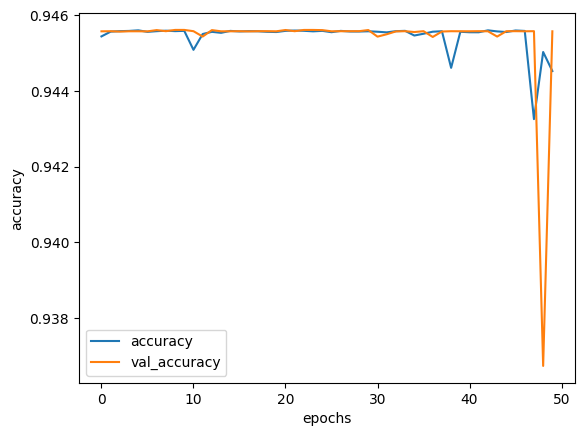

In [14]:
df_history = pd.DataFrame(historia.history)
df_history[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");